In [8]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time
from matplotlib import animation
import matplotlib.pyplot as plt

hi


In [3]:
np.set_printoptions(suppress=True)

In [4]:
# reload(h_env)

# Normal Game Play

In [4]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [5]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
#_ = env.render()

one episode with random agents

In [5]:
env = h_env.HockeyEnv()
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2])) 
    obs_agent2 = env.obs_agent_two()
    if d or t: break
env.close()

2025-02-12 10:37:12.535 python[86249:4666723] +[IMKClient subclass]: chose IMKClient_Legacy
2025-02-12 10:37:12.535 python[86249:4666723] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [6]:
info, env.get_info_agent_two()

({'winner': 1,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.002198939666748047},
 {'winner': -1,
  'reward_closeness_to_puck': -0.17064185242919838,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.002198939666748047})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [7]:
env.close()

# Train Shooting

In [8]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [9]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render(mode="human")
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Train DEFENDING

In [6]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_DEFENSE)

In [7]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

2025-02-12 10:39:33.197 python[86290:4668670] +[IMKClient subclass]: chose IMKClient_Legacy
2025-02-12 10:39:33.197 python[86290:4668670] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


-0.3866420953972938
-0.2170629504038235
-0.09307860149331315
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.0


In [8]:
env.close()

# Using discrete actions

In [9]:
import random

In [10]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [11]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

: 

In [ ]:
env.close()

# Hand-crafted Opponent

In [4]:
env = h_env.HockeyEnv()

In [6]:
o, info = env.reset()
#_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

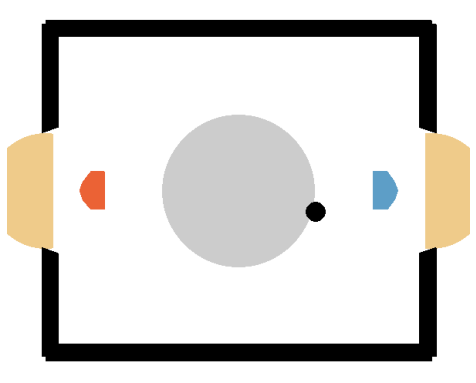

In [12]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
frames = []
for _ in range(251):
    #frames.append(env.render(mode="rgb_array")) # uncomment to save gif
    env.render
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

# uncomment to save gif
# env.close()
# plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

# patch = plt.imshow(frames[0])
# plt.axis('off')

# def animate(i):
#     patch.set_data(frames[i])

# anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
# anim.save('gif.gif', writer='pillow', fps=60)

In [ ]:
info

In [ ]:
np.mean(obs_buffer,axis=0)

In [ ]:
np.std(obs_buffer,axis=0)

If you want to use a fixed observation scaling, this might be a reasonable choice

In [ ]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [ ]:
import pylab as plt

In [ ]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

In [ ]:
plt.plot(obs_buffer[:,12])

In [ ]:
plt.plot(reward_buffer[:])

In [ ]:
np.sum(reward_buffer)

In [ ]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

In [ ]:
env.close()

# Human Opponent

In [ ]:
env = h_env.HockeyEnv()

In [ ]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


In [ ]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


In [ ]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [ ]:
env.close()

# Check side consistency

In [ ]:
env = h_env.HockeyEnv()

In [ ]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [ ]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

In [ ]:
obs_buffer.shape

In [ ]:
np.mean(obs_buffer,axis=0)

In [ ]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

In [ ]:
winner_buffer

In [ ]:
np.mean(winner_buffer,axis=0)

In [ ]:
np.std(winner_buffer,axis=0)

In [ ]:
np.sum(reward_buffer), np.sum(reward2_buffer)

In [ ]:
env.close()